## Data Dictionary

|Variable	|Definition	|Key|
|:-----------:|:-----------|:-----|
|survival	|Survival	|0 = No, 1 = Yes|
|pclass	|Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex	|Sex	|-|
|Age	|Age in years	|  -|
|sibsp	|# of siblings / spouses aboard the Titanic	|  -|
|parch	|# of parents / children aboard the Titanic	|  -|
|ticket	|Ticket number	|  -|
|fare	|Passenger fare	|  -|
|cabin	|Cabin number	|  -|
|embarked	|Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton|

## 导包&读取数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('titanic-data.csv')

## 数据基本信息

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


复制数据以避免在原数据上直接进行修改。

In [25]:
dfc=df.copy()

## 数据处理

1. Sex中female转为1，male转为2；
2. Embarked中C转为1，Q转为2，S转为3；
3. Age和Embarked存在缺失数据，分别以相应存活和罹难的对应平均数补充；

Sex中female转为0，male转为1；
Embarked中C转为0，Q转为1，S转为2；

In [26]:
def dfTransfer(name,value,num):
    dfc.loc[dfc[name]==value,name]=num

In [27]:
dfTransfer('Sex','female',1)
dfTransfer('Sex','male',2)

dfTransfer('Embarked','C',1)
dfTransfer('Embarked','Q',2)
dfTransfer('Embarked','S',3)

Age和Embarked存在缺失数据，分别以相应存活和罹难的对应平均数补充

In [28]:
def filledWithAvg(name):
    mSur=dfc.loc[dfc['Survived']==1,name].mean()
    mDie=dfc.loc[dfc['Survived']==0,name].mean()
    dfc.loc[(dfc['Survived']==1)&(dfc[name].isnull()),name]=mSur
    dfc.loc[(dfc['Survived']==0)&(dfc[name].isnull()),name]=mDie

In [29]:
filledWithAvg('Age')
filledWithAvg('Embarked')

In [30]:
dfc['Embarked']=dfc['Embarked'].astype(float)

## 分析数据

### 总体生还率

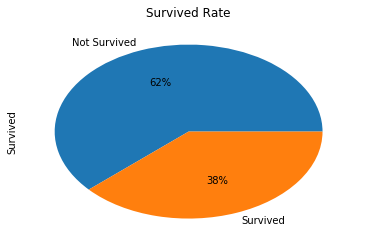

In [31]:
dfc.Survived.value_counts().plot(kind='pie',autopct='%.0f%%',labels=['Not Survived','Survived'],title='Survived Rate')
plt.show()

In [72]:
def showServivedRate(name):
    dfPclass=dfc[[name,'Survived']]
    countPclass=dfPclass.groupby([name,'Survived'])['Survived'].count().unstack()
    countPclass['rate']=countPclass.loc[:,0]*100/(countPclass.loc[:,0]+countPclass.loc[:,1])
    countPclass['rate'].plot()
    plt.xlabel(name)
    plt.ylabel('Survive Rate(%)')
    plt.show()

### 船票等级与生存率的关系

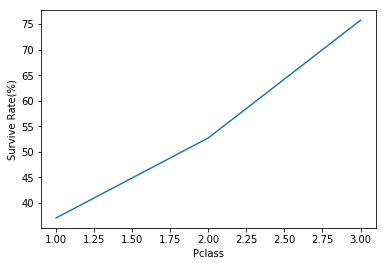

In [73]:
showServivedRate('Pclass')

可见船票等级越高，存活可能性越大

### 性别与生存率的关系

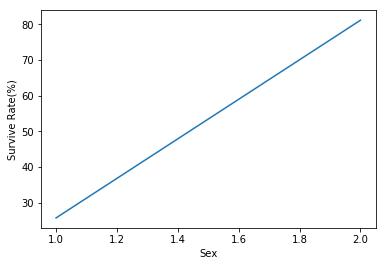

In [74]:
showServivedRate('Sex')

### 年龄与生存率的关系

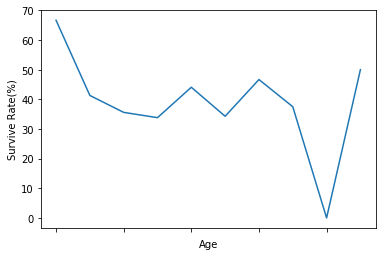

In [75]:
def get_survived_rate(group):
    return {'rate': group.sum()*100/group.count()}

dfPclass=dfc[['Age','Survived']]
quartiles = pd.cut(dfPclass.Age, 10)
countPclass=dfPclass.Survived.groupby(quartiles).apply(get_survived_rate).unstack()
# countPclass['rate']=countPclass.loc[:,0]/(countPclass.loc[:,0]+countPclass.loc[:,1])
countPclass['rate'].plot()
plt.xlabel('Age')
plt.ylabel('Survive Rate(%)')
plt.show()

### 同伴数量与生存率的关系

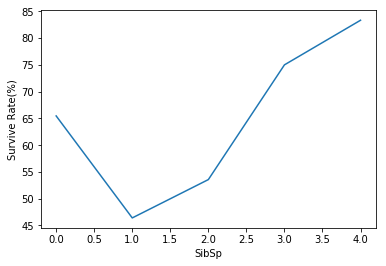

In [76]:
showServivedRate('SibSp')

### 携带老人儿童数量与生存率的关系

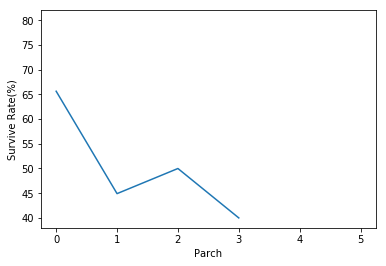

In [77]:
showServivedRate('Parch')

### 费用与生存率的关系

d:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in longlong_scalars
  


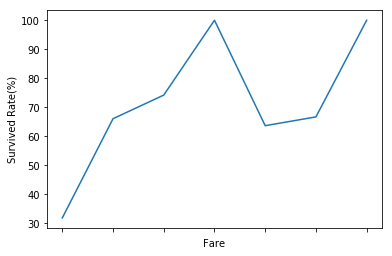

In [79]:
def get_survived_rate(group):
    return {'rate': group.sum()*100/group.count()}

dfPclass=dfc[['Fare','Survived']]
quartiles = pd.cut(dfPclass.Fare, 10)
countPclass=dfPclass.Survived.groupby(quartiles).apply(get_survived_rate).unstack()
# countPclass['rate']=countPclass.loc[:,0]/(countPclass.loc[:,0]+countPclass.loc[:,1])
countPclass['rate'].plot()
plt.xlabel('Fare')
plt.ylabel('Survived Rate(%)')
plt.show()

### 登船地点与生存率的关系

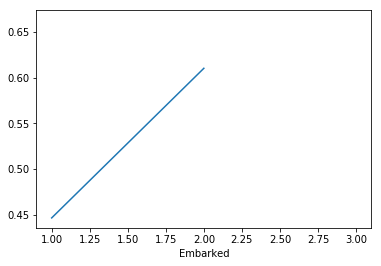

In [40]:
showServivedRate('Embarked')

## 数据分析

分析数据:

- 划入考虑的因素有：Pclass，Sex，Age，SibSp，Parch，Fare，Embarked；
- 不考虑的因素有：PassengerId，Name，Ticket，Cabin；

原因：

1. Pclass，Fare，Sex以及Age关系到人物得到救助的优先级；
2. SibSp和Parch则可反应人物求生时的负担或者因借由老幼优先跟随得到救助的几率；
3. Embark则可能存在潜在的文化、习俗、口音、地理优势等等可能因地域因素产生的微量影响；
4. PassengerId较为随机，不予考虑；
5. Cabin和Ticket虽说会有影响（比如Cabin位置可能关系到距离求生出口远近等），但是由于暂无轮船图纸，且影响相对较小，数据和相关因素复杂、不易合理转化，因此暂不考虑；
6. Name不排除会有个别影响，但是数据量较大，因此带来的影响可忽略不计。